In [4]:
import pandas as pd
import os
import sys

data_folder = os.path.join("..", 'data', "ga4_data")

data_folder

'..\\data\\ga4_data'

In [27]:
CATEGORIES = {
    "News": {"latest-news", "focus-italia"},
    # "Anticipazioni": {"anticipazioni"},
    "Recensioni": {
        "review",
        "netflix-film",
        "sky-film",
        "disney-film",
        "mubi",
        "mubi-film",
        "live-streaming-on-demand",
        "approfondimenti",
        "streaming",
    },
    "In Sala": {"in-sala"},
    "Animazione": {"animazione"},
    "Approfondimento": {"approfondimento"},
    "Festival di Cinema": {"festival-di-cinema"},
    "Trailers": {"trailers"},
    "Serie TV": {
        "serie-tv",
        "netflix-serie-tv",
        "prime-video-serietv",
        "sky-serie-tv",
        "disney-serietv",
        "paramount-serie-tv",
        "appletv-serietv",
        "tim-vision-serie-tv",
    },
    "Guide e Film da Vedere": {"film-da-vedere"},
    "Speciali e Magazine": {"magazine-2", "taxidrivers-magazine"},
    "Rubriche": {"rubriche"},
    "Interviste": {"interviews"},
}


def map_categories(path: str) -> str:
    """
    Maps a given URL path to a corresponding content category based on predefined keywords.

    :param path: The URL path string to categorize. Example: ``"recensioni/netflix-film/in-sala"``
    :type path: str

    :returns: The mapped category name. Possible values include:
              - "Recensioni"
              - "News"
              - "Serie TV"
              - "Recensioni / In Sala"
              - "Trailers / In Sala"
              - "Altro" (default if no match is found)
    :rtype: str

    The function analyzes the path by splitting it into subpaths and checking for intersections
    with keyword sets defined in the global ``CATEGORIES`` dictionary.
    """
    subpaths = path.split("/")

    if not subpaths:
        return "Altro"

    for category, keywords in CATEGORIES.items():
        if keywords.intersection(subpaths):
            # Special case: category mixed with "in-sala"
            # If anticipazioni is in the path, it should be prioritized
            if "anticipazioni" in subpaths:
                return "Anticipazioni"
            if category == "Recensioni" and "in-sala" in path:
                return "Recensioni / In Sala"
            if category == "Trailers" and "in-sala" in path:
                return "Trailers / In Sala"
            return category

    return "Altro"

In [108]:
original_data = pd.read_csv(os.path.join(data_folder, "utenti_dispositivi_articoli.csv"), header=5, skiprows=0, sep=",", usecols=[0, 1, 2])
# Drop first row

original_data = original_data.iloc[1:]

In [ ]:
# Rimuovi righe la cui Pagina di destinazione non finisce con .html
data = original_data[original_data["Pagina di destinazione"].str.endswith(".html")]
home = original_data[original_data["Pagina di destinazione"] == "/"]

,Pagina di destinazione,Categoria del dispositivo,Utenti attivi
1,/,desktop,1355
3,/,mobile,717
338,/,tablet,15


In [39]:
# Raggruppa per Pagina di destinazione e somma per Categoria del dispositivo
data

,Pagina di destinazione,Categoria del dispositivo,Utenti attivi,Categoria
140,/235490/giochi/la-cultura-dei-casino-online-in...,desktop,28,Altro
168,/255784/giochi/top-ranking-dei-fornitori-di-so...,desktop,25,Altro
237,/406106/review/in-sala/san-damiano-tra-dannazi...,desktop,20,Recensioni / In Sala
244,/445780/review/cannes/chi-si-aggiudichera-la-p...,desktop,20,Recensioni
245,/446390/cannes-film-festival/cannes-2025-il-mi...,desktop,20,Altro
...,...,...,...,...
9445,/99585/film-da-vedere/stasera-tv-rai-movie-all...,desktop,1,Guide e Film da Vedere
9446,/99701/film-da-vedere/suspiria-celebratissimo-...,desktop,1,Guide e Film da Vedere
9447,/99714/film-da-vedere/stasera-in-tv-su-la-7-al...,mobile,1,Guide e Film da Vedere
9448,/99823/film-da-vedere/piccoli-omicidi-amici-de...,tablet,1,Guide e Film da Vedere


In [59]:
data["Categoria"] = data["Pagina di destinazione"].apply(map_categories)

# Conteggia le categorie di articoli
category_counts = data["Categoria"].value_counts()
category_counts

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_24108\3614603404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Categoria"] = data["Pagina di destinazione"].apply(map_categories)


Categoria
Recensioni                979
News                      849
Festival di Cinema        800
Speciali e Magazine       366
Guide e Film da Vedere    314
Serie TV                  278
Anticipazioni             213
Interviste                211
Recensioni / In Sala      179
Rubriche                  113
Trailers                   92
Altro                      68
Approfondimento            43
Animazione                  5
Trailers / In Sala          4
Name: count, dtype: int64

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_24108\317796793.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Categoria"] = data["Pagina di destinazione"].apply(map_categories)


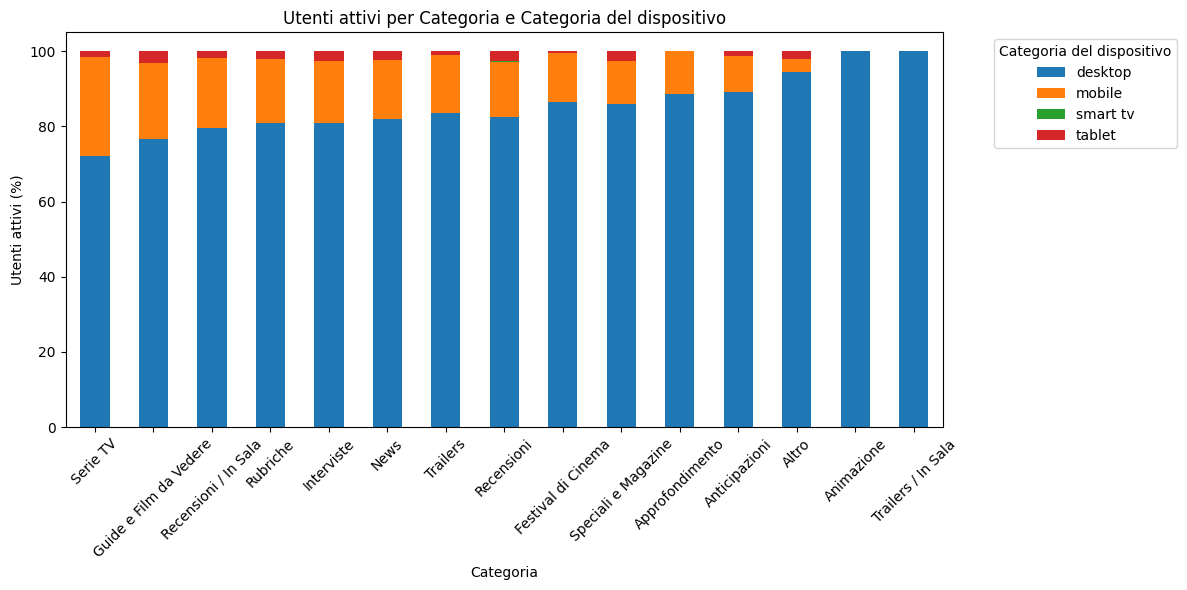

In [ ]:

# Stacked bar chart di "Utenti attivi" per ogni categoria, con barre sovrapposte che dividono per "Categoria del dispositivo", normalizzando da 0 a 100, ordinando per percentuale del mobile

import matplotlib.pyplot as plt

pivot_data = data.pivot_table(index="Categoria", columns="Categoria del dispositivo", values="Utenti attivi", aggfunc="sum", fill_value=0)

# Normalizza i dati da 0 a 100
pivot_data = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100
# For each index of pivot, take the "Utenti attivi" of "Categoria del dispositivo" == "mobile"
mobile_data = pivot_data["mobile"]
# Sort pivot data index on mobile_data
pivot_data = pivot_data.loc[mobile_data.sort_values(ascending=False).index]

ax = pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Utenti attivi per Categoria e Categoria del dispositivo")
plt.xlabel("Categoria")
plt.ylabel("Utenti attivi (%)")
plt.xticks(rotation=45)
# Take legend off the chart
plt.legend(title="Categoria del dispositivo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


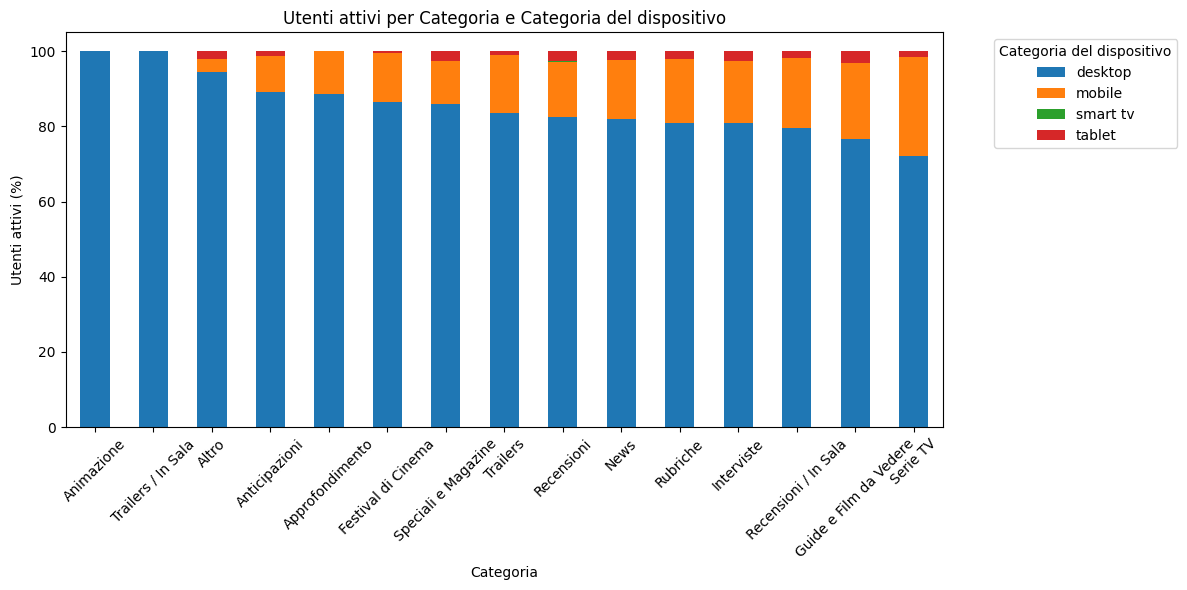

In [58]:
# For each index of pivot, take the "Utenti attivi" of "Categoria del dispositivo" == "desktop"
desktop_data = pivot_data["desktop"]
# Sort pivot data index on desktop_data
pivot_data = pivot_data.loc[desktop_data.sort_values(ascending=False).index]

ax = pivot_data.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Utenti attivi per Categoria e Categoria del dispositivo")
plt.xlabel("Categoria")
plt.ylabel("Utenti attivi (%)")
plt.xticks(rotation=45)
# Take legend off the chart
plt.legend(title="Categoria del dispositivo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [64]:
def assign_manual_content_length_category(categoria):
    long_content = {"Interviste", "Approfondimento", "Speciali e Magazine"}
    medium_content = {
        "Serie TV",
        "Recensioni",
        "Guide e Film da Vedere",
        "Festival di Cinema",
        "Recensioni / In Sala",
        "Altro",
        "Animazione",
        "Rubriche",
    }
    short_content = {"News", "Anticipazioni", "Trailers", "Trailers / In Sala"}

    if categoria in long_content:
        return "Long"
    elif categoria in medium_content:
        return "Medium"
    elif categoria in short_content:
        return "Short"
    else:
        return "Unknown"


# Assign content length categories

data["Content Length Category"] = data["Categoria"].apply(
    assign_manual_content_length_category
)

content_length_category_count = data["Content Length Category"].value_counts()

C:\Users\manuel.deluzi\AppData\Local\Temp\ipykernel_24108\2168551374.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Content Length Category"] = data["Categoria"].apply(


Content Length Category,Long,Medium,Short
Categoria del dispositivo,,,
desktop,84.623218,82.485066,83.616384
mobile,12.932790,15.603345,14.485514
smart tv,0.000000,0.023895,0.000000
tablet,2.443992,1.887694,1.898102


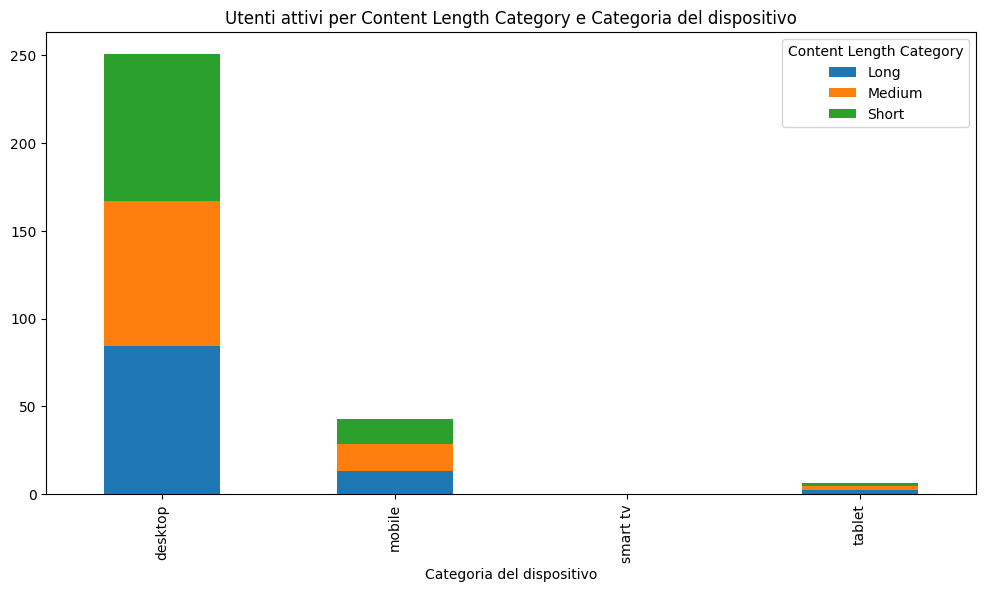

In [97]:
# Compute "Utenti attivi" for each "Content Length Category"
content_length_pivot = data.pivot_table(
    index="Content Length Category",
    columns="Categoria del dispositivo",
    values="Utenti attivi",
    aggfunc="sum",
    fill_value=0
)

# Normalize the data in each column

def normalize_column(column):
    return column / column.sum() * 100


content_length_pivot = content_length_pivot.T.apply(normalize_column, axis=0)

content_length_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Utenti attivi per Content Length Category e Categoria del dispositivo")

content_length_pivot

In [113]:
home["Utenti attivi"].sum() / original_data["Utenti attivi"].sum()*100

np.float64(5.205007980845969)

In [118]:
home.groupby("Categoria del dispositivo")["Utenti attivi"].sum() / original_data.groupby("Categoria del dispositivo")["Utenti attivi"].sum() * 100

Categoria del dispositivo
desktop     5.681104
mobile      4.881868
smart tv         NaN
tablet      0.970246
Name: Utenti attivi, dtype: float64